In [33]:
import tables
import numpy as np
import h5py

r1 = np.arange(0.01, 0.40, 0.01)
r2 = np.arange(0.40, 0.65, 0.002)
r = np.hstack((r1,r2))
ra = []
data = []
for radius in r:
    h1 = tables.open_file("./file%.3f.h5" % radius)
    try:
        a = h1.root.result[:]
        data.append(a)
        ra.append(radius)
    except:
        print(radius)
        pass
    h1.close()

In [9]:
real = []
recon = []
for index, x in enumerate(ra):
    real = np.hstack((real, ra[index] * np.ones(np.size(data[index]))))
    recon = np.hstack((recon, data[index]))

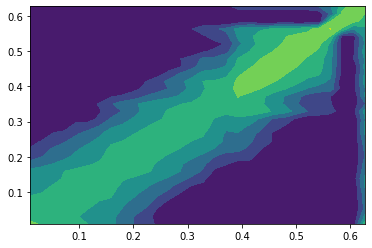

In [21]:
import matplotlib.pyplot as plt

H, xedges, yedges = np.histogram2d(real, recon, bins=30)

plt.contourf(xedges[0:-1], yedges[0:-1], np.log(np.nan_to_num(H)+1).T)
#plt.hist2d(real, recon, bins=30)
#plt.show()

(array([ 1454.,    49.,    23.,    69.,    85.,    33.,    20.,    23.,
           55.,    76.,    58.,    31.,    28.,   128.,   101.,   148.,
          115.,   248.,  1204., 12101.]),
 array([0.01  , 0.0419, 0.0738, 0.1057, 0.1376, 0.1695, 0.2014, 0.2333,
        0.2652, 0.2971, 0.329 , 0.3609, 0.3928, 0.4247, 0.4566, 0.4885,
        0.5204, 0.5523, 0.5842, 0.6161, 0.648 ]),
 <a list of 20 Patch objects>)

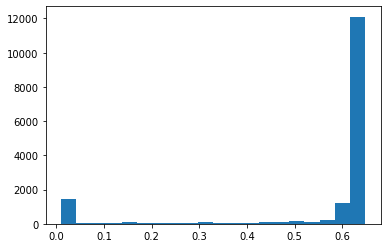

In [32]:
h1 = tables.open_file("./file0.640.h5" % radius)
plt.hist(h1.root.result[:], bins=20)